In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("datasets/student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.shape

(25, 2)

In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0, 0.5, 'Percentage Score')

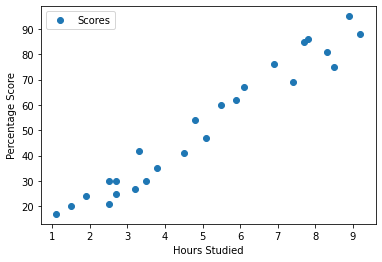

In [5]:
df.plot(x='Hours', y='Scores', style='o')
plt.xlabel('Hours Studied')
plt.ylabel("Percentage Score")

In [6]:
#clean data if needed

#get features and labels
X = df["Hours"].values
y = df["Scores"].values

from sklearn.model_selection import train_test_split
#get training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = X_train.reshape(-1, 1)

In [7]:
#often will have hyperparameters to try we will do a loop with different values
from sklearn.linear_model import LinearRegression
regessor = LinearRegression()

regessor.fit(X_train, y_train)


LinearRegression()

In [8]:
regessor.intercept_
regessor.coef_

array([9.85731949])

In [9]:
y_pred = regessor.predict(X_test.reshape(-1,1))

In [10]:
result_df = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred})
result_df

,Actual,Predicted
0,47,52.074318
1,76,69.817493
2,17,12.645040
3,60,56.017245
4,81,83.617740


In [11]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.4424559919304984
Mean Squared Error: 21.130534739422853
Root Mean Squared Error: 4.596796138553771


In [12]:
#Multiple Linear Regression

df = pd.read_csv("datasets/petrol_consumption.csv")

In [13]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [14]:
X = df.drop("Petrol_Consumption", axis=1)
y = df["Petrol_Consumption"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [16]:
regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression()

In [17]:
coeff_df= pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-47.730284
Average_income,-0.060200
Paved_Highways,-0.004809
Population_Driver_licence(%),1208.266020


In [18]:
y_pred = regressor.predict(X_test)

In [19]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [20]:
df

,Actual,Predicted
25,566,509.782303
36,640,645.088242
43,591,570.568087
2,561,559.808119
28,574,546.445946
23,547,445.120475
39,968,726.380873
31,554,582.256726
21,540,571.549306
11,471,428.441620


In [21]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 59.43262400351529
Mean Squared Error: 6708.142615541042
Root Mean Squared Error: 81.90325155658377
